# Restart
데이터셋 분류를 잘못했다. <br/>

test에 포함된 폰트의 글자가 train, val에도 섞여들었음을 확인했다. <br/>
생성한 이미지에서 '폰트'를 기준으로 train / val / test 개수를 설정한 후 별도의 폴더에 저장하자.
<br/>
**obj 파일을 만들기 전에 나누는 것, 이미지 파일이 아닌 폰트를 기준으로 개수를 나누는 것** 이 핵심이다.

---

또한 test셋을 출력할 때에는 같은 폰트(카테고리 말고!)끼리 묶여서 출력하도록 sorting하자.<br/>
- a\~Z 이미지를 만들어내기 전에, 폰트별로 먼저 split하고 a\~Z를 만들자.


---

In [2]:
import os
import glob
import shutil
import numpy as np
from tqdm import tqdm
from PIL import Image,ImageDraw,ImageFont
import torch
import matplotlib.pyplot as plt
%matplotlib inline

---

## 이미지 파일 split
train / val / test = 0.8 / 0.15 / 0.05 비율을 폰트 파일에 적용하여 나누자 <br/>
7번 노트북의 코드를 사용할 것이다. <br/>
이전과 같이, **serif, display, handwriting** 카테고리만 생성한다.

In [1]:
r_train = 0.8
r_val   = 0.15
r_test  = 0.05

In [3]:
def extract_filename(path):
    filenames = []
    for filename in glob.iglob(path + '*.png'):
        filenames.append(filename[17:])
    return filenames

In [4]:
# 원본 이미지 파일명
original_serif       = extract_filename('collection/img/0/')
original_display     = extract_filename('collection/img/2/')
original_handwriting = extract_filename('collection/img/3/')

In [5]:
# 카테고리별 파일 개수
size_serif       = int(len(original_serif)/52)       # 182 
size_display     = int(len(original_display)/52)     # 283 
size_handwriting = int(len(original_handwriting)/52) # 140 

In [6]:
def split_each_font(size, splt_test, splt_val):
    test = int(np.floor(splt_test * size))
    val  = int(np.floor((splt_test + splt_val) * size))
    return test, val

In [7]:
# serif split
split_test_serif, split_valid_serif = split_each_font(size_serif, r_test, r_val)

# display split
split_test_display, split_valid_display = split_each_font(size_display, r_test, r_val)

# serif split
split_test_handwriting, split_valid_handwriting = split_each_font(size_handwriting, r_test, r_val)

In [8]:
def get_idx_sampler(size, splt_test, splt_val):
    idx = list(range(size))
    train_idxs = idx[splt_val:]
    val_idxs   = idx[splt_test: splt_val]
    test_idxs  = idx[: splt_test]
    return train_idxs, val_idxs, test_idxs

In [9]:
train_i_serif, val_i_serif, test_i_serif = get_idx_sampler(size_serif, split_test_serif, split_valid_serif)
train_i_disp, val_i_disp, test_i_disp    = get_idx_sampler(size_display, split_test_display, split_valid_display)
train_i_hand, val_i_hand, test_i_hand    = get_idx_sampler(size_handwriting, split_test_handwriting, split_valid_handwriting)

In [10]:
print('           train val test')
print('serif:       ', len(train_i_serif), len(val_i_serif), len(test_i_serif))
print('display:     ', len(train_i_disp), len(val_i_disp), len(test_i_disp))
print('handwriting: ', len(train_i_hand), len(val_i_hand), len(test_i_hand))

           train val test
serif:        146 27 9
display:      227 42 14
handwriting:  112 21 7


위 갯수는 '폰트의 개수'를 의미한다. 이제 이미지가 담긴 폴더에서 해당 갯수만큼 추출해 별도의 폴더로 옮기자

---
## Separate folders


In [16]:
from_dir = 'collection/img/' # + index
to_dir = 'collection/img/'   # + train/val/test

In [12]:
len(glob.glob('collection/img/0/*.png'))

9464

In [13]:
def move_img(cateIdx, purpose, fromDir, toDir, filename):
    fromDir += str(cateIdx) + '/' + filename
    toDir   += purpose + '/' + filename
    shutil.move(fromDir, toDir)

In [23]:
categories   = [0, 2, 3] # serif, display, handwriting
purposes     = ['train', 'val', 'test']

In [21]:
dict_params = {
    0 : {
        'train': len(train_i_serif),
        'val'  : len(val_i_serif),
        'test' : len(test_i_serif)
    },
    2 : {
        'train': len(train_i_disp),
        'val'  : len(val_i_disp),
        'test' : len(test_i_disp)
    },
    3 : {
        'train': len(train_i_hand),
        'val'  : len(val_i_hand),
        'test' : len(test_i_hand)
    },
}

안전하게 따로 작업하자...ㅎ

In [86]:
# spliting - Serif
for purpose in purposes: # train, val, test
    for (idx, img) in enumerate(sorted(glob.glob('collection/img/{}/*.png'.format(0)))): # sorted를 하면 정렬된다는 것을 잊고 살았다.
        img_name = img[17:]
        num_file = dict_params[0][purpose] * 52
        move_img(0, purpose, from_dir, to_dir, img_name)
        if idx+1 == num_file:
            break

In [91]:
# spliting - Display
for purpose in purposes: # train, val, test
    for (idx, img) in enumerate(sorted(glob.glob('collection/img/{}/*.png'.format(2)))):
        img_name = img[17:]
        num_file = dict_params[2][purpose] * 52
        move_img(2, purpose, from_dir, to_dir, img_name)
        if idx+1 == num_file:
            break

In [95]:
# spliting - Handwriting
for purpose in purposes: # train, val, test
    for (idx, img) in enumerate(sorted(glob.glob('collection/img/{}/*.png'.format(3)))):
        img_name = img[17:]
        num_file = dict_params[3][purpose] * 52
        move_img(3, purpose, from_dir, to_dir, img_name)
        if idx+1 == num_file:
            break

In [106]:
# 개수 확인
num_train = len(glob.glob('collection/img/train/*.png')) # 146 + 227 + 112 = 485개 폰트
num_val   = len(glob.glob('collection/img/val/*.png'))   # 27 + 42 + 21 = 90개 폰트
num_test  = len(glob.glob('collection/img/test/*.png')) # 9 + 14 + 7 = 30개 폰트

print('train 폰트 개수: {}개, 데이터 개수: {}개'.format(num_train/52, num_train))
print('val   폰트 개수: {}개, 데이터 개수: {}개'.format(num_val/52, num_val))
print('test  폰트 개수: {}개, 데이터 개수: {}개'.format(num_test/52, num_test))

train 폰트 개수: 485.0개, 데이터 개수: 25220개
val   폰트 개수: 90.0개, 데이터 개수: 4680개
test  폰트 개수: 30.0개, 데이터 개수: 1560개


---
## obj 파일 만들기
드디어 정렬된, 폰트별로 분리된 이미지 폴더를 얻었다. <br/>
기존의 FontDataset을 사용할 수도 있겠다는 느낌이 든다 (NewFontDataset을 안써도 된다는 소리). <br/>
01번 노트북의 코드를 재활용하겠다.

In [108]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_final(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png')) # 카테고리 폴더 내 모든 png 파일
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in sorted(paths): # sorted 추가!!
            label = os.path.basename(p) # 파일 이름을 저장(추후 DataSet에서 분리)
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in .obj, end'.format(train_count))
    return

In [113]:
save_dir = './dataset/allfonts/'
purposes = ['train', 'val', 'test']

for purpose in purposes:
    from_dir = './collection/img/{}/'.format(purpose)
    train_path = os.path.join(save_dir, '{}.obj'.format(purpose))
    
    pickle_examples_final(from_dir, train_path)

25220 imgs saved in .obj, end
4680 imgs saved in .obj, end
1560 imgs saved in .obj, end


---
## 데이터 최종 점검
FontDataset 클래스를 사용할 것이다.

In [115]:
from common.dataset import FontDataset
from common.dataset import PickledImageProvider

In [116]:
directory = 'dataset/allfonts/'

dset_train = FontDataset(PickledImageProvider(directory + 'train.obj'))
dset_val   = FontDataset(PickledImageProvider(directory + 'val.obj'))
dset_test  = FontDataset(PickledImageProvider(directory + 'test.obj'))

processed 1000 examples
processed 2000 examples
processed 3000 examples
processed 4000 examples
processed 5000 examples
processed 6000 examples
processed 7000 examples
processed 8000 examples
processed 9000 examples
processed 10000 examples
processed 11000 examples
processed 12000 examples
processed 13000 examples
processed 14000 examples
processed 15000 examples
processed 16000 examples
processed 17000 examples
processed 18000 examples
processed 19000 examples
processed 20000 examples
processed 21000 examples
processed 22000 examples
processed 23000 examples
processed 24000 examples
processed 25000 examples
processed 26000 examples
processed 27000 examples
processed 28000 examples
processed 29000 examples
processed 30000 examples
processed 31000 examples
processed 32000 examples
processed 33000 examples
processed 34000 examples
processed 35000 examples
processed 36000 examples
processed 37000 examples
processed 38000 examples
processed 39000 examples
processed 40000 examples
processed

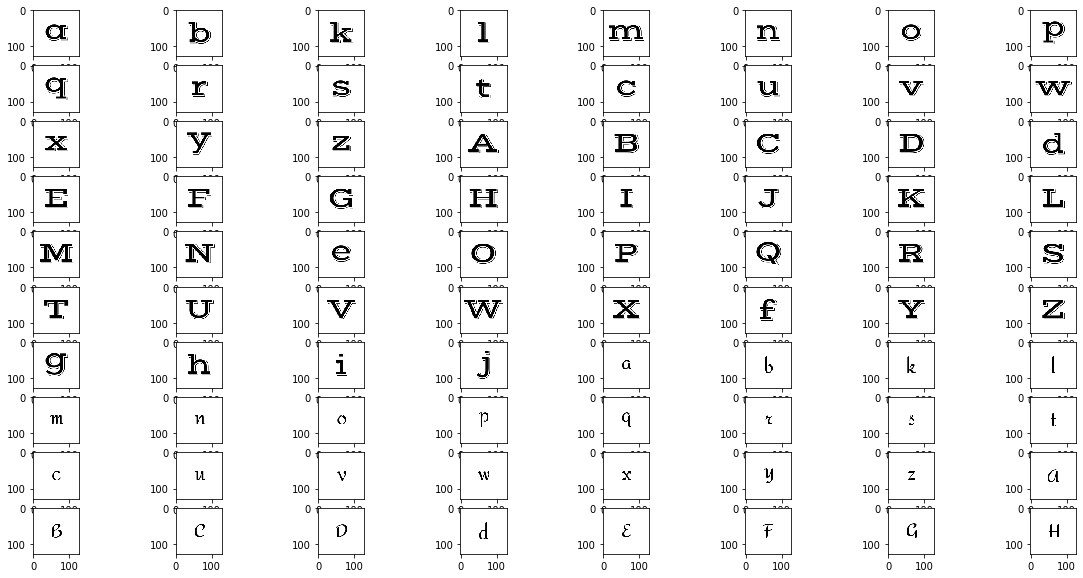

In [133]:
plt.figure(figsize=(20, 10))
for idx in range(80):
    plt.subplot(10, 8, idx+1)
    plt.imshow(dset_test[idx+1144][1], cmap='gray', label=idx)
plt.show()

소문자 알파벳 c~j가 이상한 순서로 배치되긴 하지만 같은 폰트의 52개 글자 모두 붙어서 출력된다. <br/>
인덱스의 숫자 정렬 방법에 따라 순서가 약간 바뀐 것이다.

In [134]:
dset_test[0]

({'category_vector': array([1, 0, 0, 0, 0]),
  'font': 92,
  'alphabet_vector': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0])},
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 {'category_vector': 5, 'alphabet_vector': 52, 'font_vector': 16384})

---
# 정리
- 0, 2, 3번 카테고리(serif, display, handwriting)를 사용하여 최종 데이터셋 제작
- test 뿐 아니라 train, val에서도 폰트끼리 묶여서 출력됨 (단, 폰트 내에서 c~j는 순서가 다름. 사용하는 데 지장 X)
- 이제 NewFontDataset은 사용하지 않아도 된다(주석처리). 기존의 FontDataset을 사용할 것

### train.obj
    - 폰트 개수: serif(146) + disp(227) + hand(112) = 485개
    - 데이터 개수: 25220(485*52)개
    
### val.obj
    - 폰트 개수: serif(27) + disp(42) + hand(21) = 90개
    - 데이터 개수: 4680(90*52)개

### test.obj
    - 폰트 개수: serif(9) + disp(14) + hand(7) = 30개
    - 데이터 개수: 1560(30*52)개